# Problem sheet 07

## Exercise 7.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Part 1

In [8]:
def generate_histograms_for_sigma(sigma, num_samples=10000, bins=100, bin_range=(-4, 4)):
    mu_values = np.linspace(-1, 1, num=21)
    histograms = []
    
    for mu in mu_values:
        samples = np.random.normal(loc=mu, scale=sigma, size=num_samples)
        hist, bin_edges = np.histogram(samples, bins=np.linspace(bin_range[0], bin_range[1], bins+1), density=True)
        histograms.append(hist)
    
    return np.array(histograms), mu_values

sigma_values = [0.8, 0.4, 0.2, 0.1]
all_histograms = {}

for sigma in sigma_values:
    all_histograms[sigma], _ = generate_histograms_for_sigma(sigma)

# Displaying the shape of the generated histograms
for sigma, histograms in all_histograms.items():
    print(f"Histograms for sigma={sigma} have shape: {histograms.shape}")

Histograms for sigma=0.8 have shape: (21, 100)
Histograms for sigma=0.4 have shape: (21, 100)
Histograms for sigma=0.2 have shape: (21, 100)
Histograms for sigma=0.1 have shape: (21, 100)


Analyzing histograms for sigma=0.8 with PCA


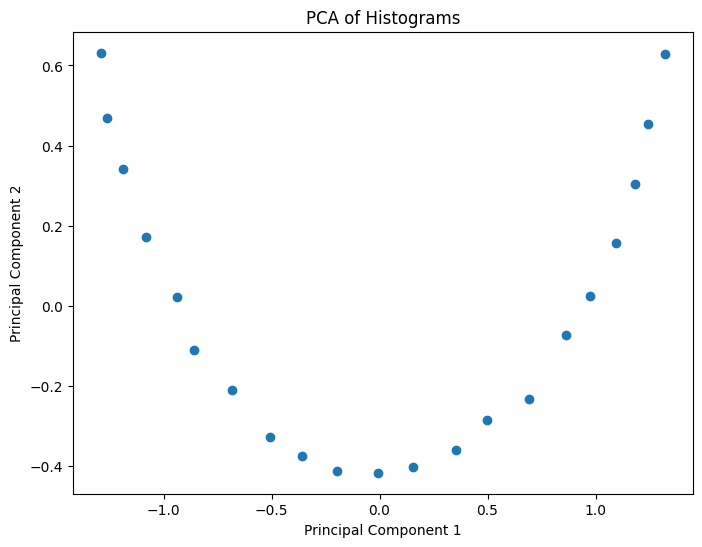

Analyzing histograms for sigma=0.4 with PCA


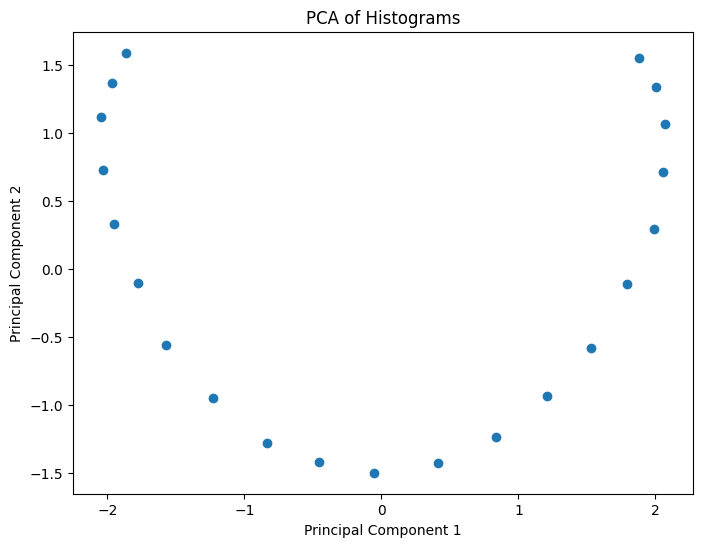

Analyzing histograms for sigma=0.2 with PCA


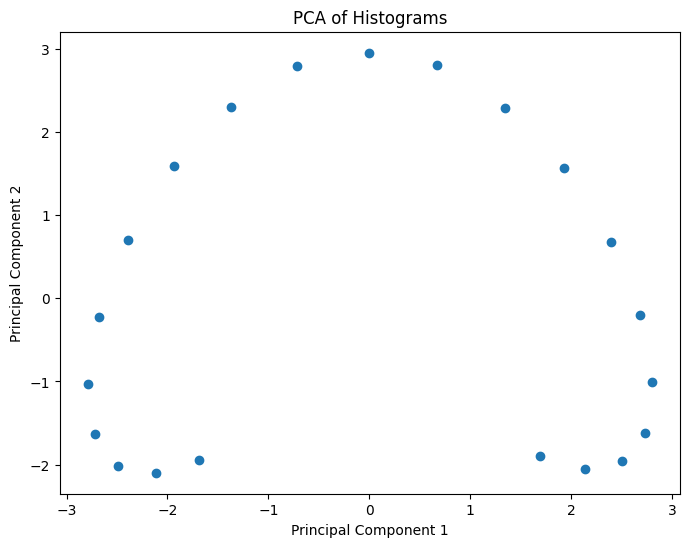

Analyzing histograms for sigma=0.1 with PCA


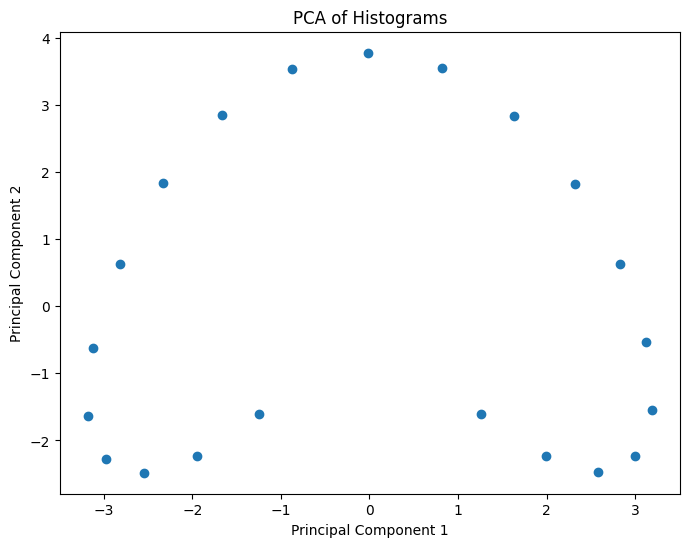

In [9]:
def analyze_histograms_with_pca(histograms):
    pca = PCA(n_components=2)
    transformed_data = pca.fit_transform(histograms)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
    plt.title("PCA of Histograms")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()
    
    return pca

# Analyzing histograms for each sigma value separately with PCA
pca_results = {}
for sigma, histograms in all_histograms.items():
    print(f"Analyzing histograms for sigma={sigma} with PCA")
    pca_results[sigma] = analyze_histograms_with_pca(histograms)


### Part 2

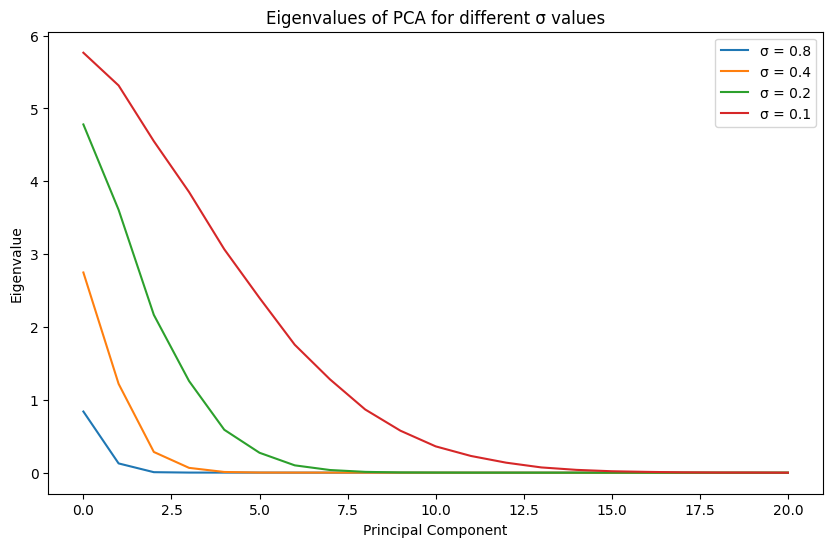

Sigma: 0.8
Eigenvalues: [0.8399168  0.12759587 0.00746999 0.00199149 0.00153056]
Explained variance ratio: [0.85088864 0.12926266 0.00756757 0.00201751 0.00155055]
------------------------------
Sigma: 0.4
Eigenvalues: [2.7481337  1.21965208 0.28494561 0.06665524 0.01018495]
Explained variance ratio: [0.6329232  0.28089831 0.06562588 0.01535138 0.0023457 ]
------------------------------
Sigma: 0.2
Eigenvalues: [4.77995592 3.60803376 2.16646492 1.2582263  0.58958592]
Explained variance ratio: [0.37239319 0.28109197 0.16878331 0.09802494 0.04593301]
------------------------------
Sigma: 0.1
Eigenvalues: [5.76428605 5.31472456 4.5500526  3.85210239 3.0665943 ]
Explained variance ratio: [0.19016796 0.17533661 0.15010952 0.12708364 0.10116916]
------------------------------


In [10]:
sigma_values = [0.8, 0.4, 0.2, 0.1]
all_histograms = {}

for sigma in sigma_values:
    all_histograms[sigma], _ = generate_histograms_for_sigma(sigma)

pca_results = {}
eigenvalues = {}

for sigma, histograms in all_histograms.items():
    pca = PCA()
    pca.fit(histograms)
    pca_results[sigma] = pca
    eigenvalues[sigma] = pca.explained_variance_

plt.figure(figsize=(10, 6))

for sigma in sigma_values:
    plt.plot(eigenvalues[sigma], label=f'σ = {sigma}')

plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of PCA for different σ values')
plt.legend()
plt.show()

for sigma in sigma_values:
    print(f'Sigma: {sigma}')
    print(f'Eigenvalues: {eigenvalues[sigma][:5]}')
    print(f'Explained variance ratio: {pca_results[sigma].explained_variance_ratio_[:5]}')
    print('-' * 30)

### Part 3

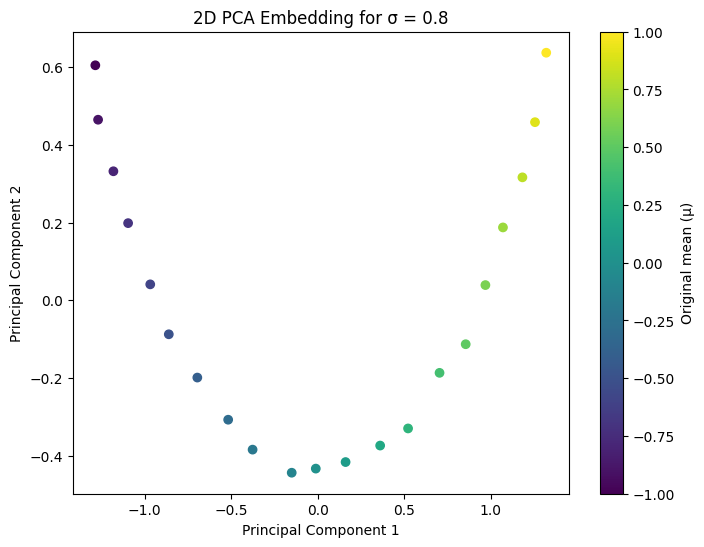

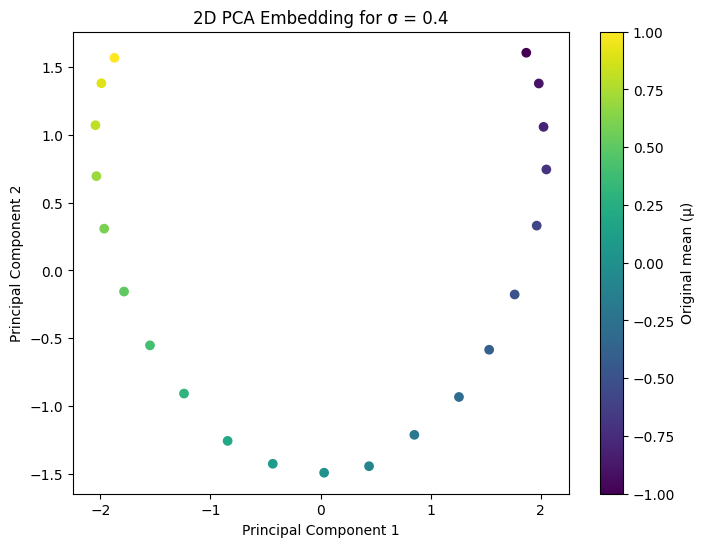

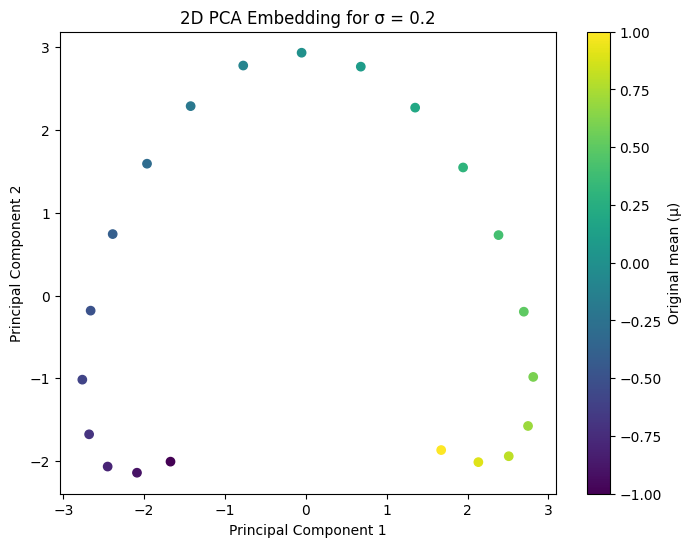

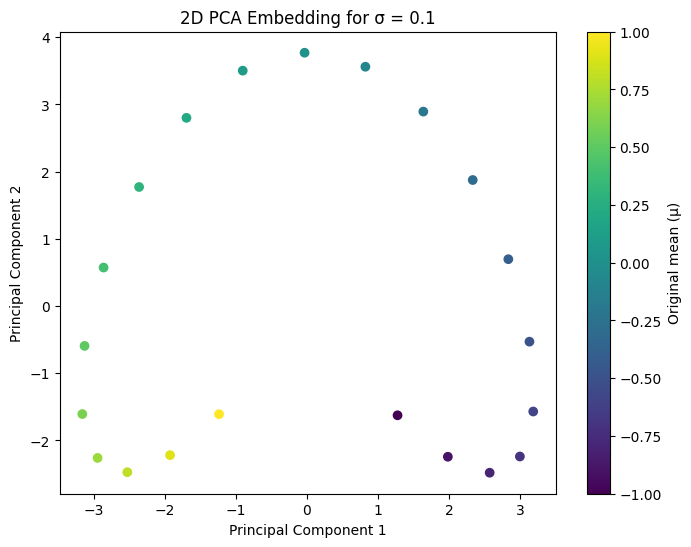

In [11]:
all_histograms = {}
all_mu_values = {}

for sigma in sigma_values:
    histograms, mu_values = generate_histograms_for_sigma(sigma)
    all_histograms[sigma] = histograms
    all_mu_values[sigma] = mu_values

# Apply PCA and plot 2-dimensional embeddings
def plot_pca_embeddings(histograms, mu_values, sigma):
    pca = PCA(n_components=2)
    transformed_data = pca.fit_transform(histograms)
    
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=mu_values, cmap='viridis')
    plt.colorbar(scatter, label='Original mean (μ)')
    plt.title(f'2D PCA Embedding for σ = {sigma}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Plotting PCA embeddings for each sigma
for sigma in sigma_values:
    plot_pca_embeddings(all_histograms[sigma], all_mu_values[sigma], sigma)


### Part 4

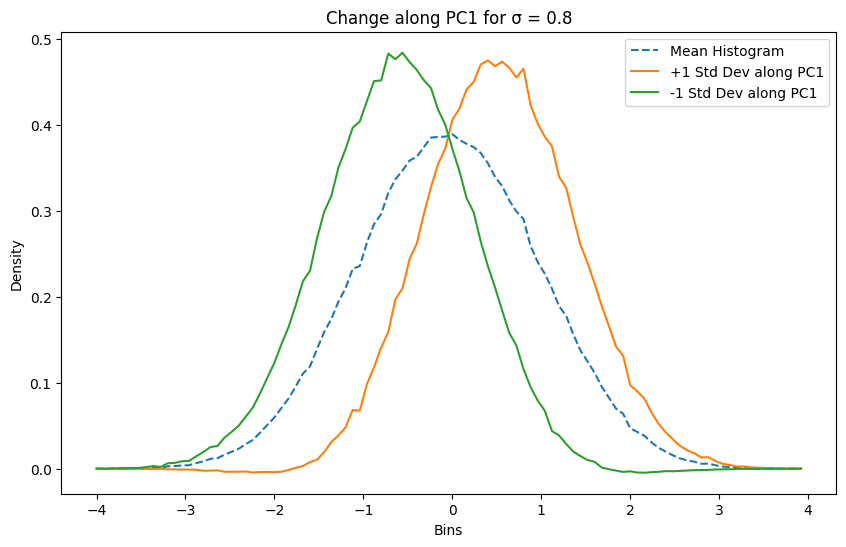

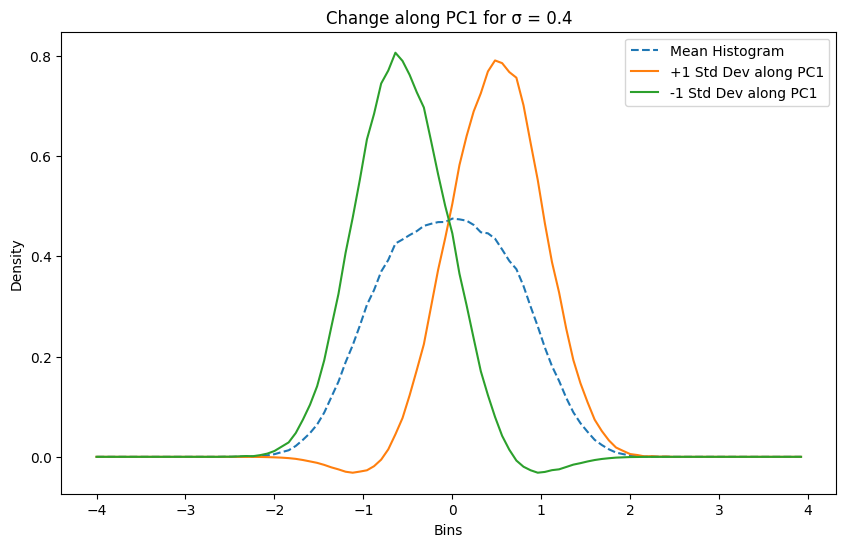

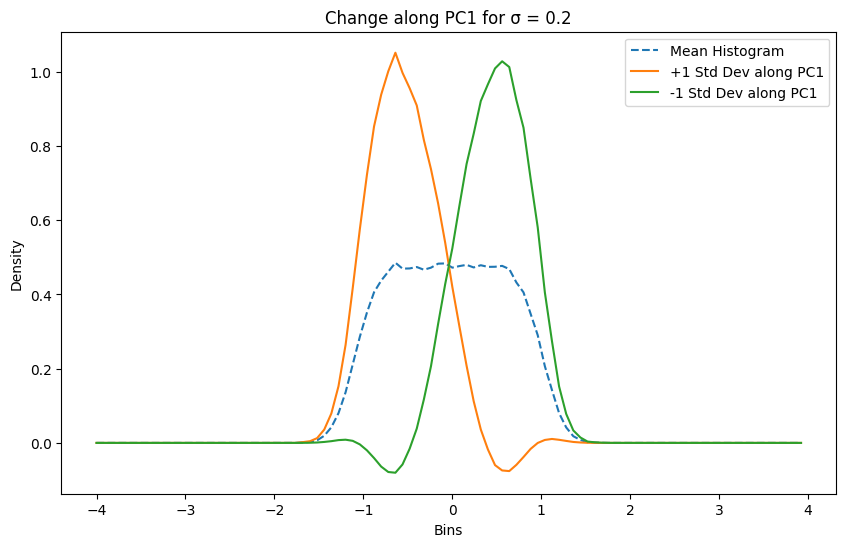

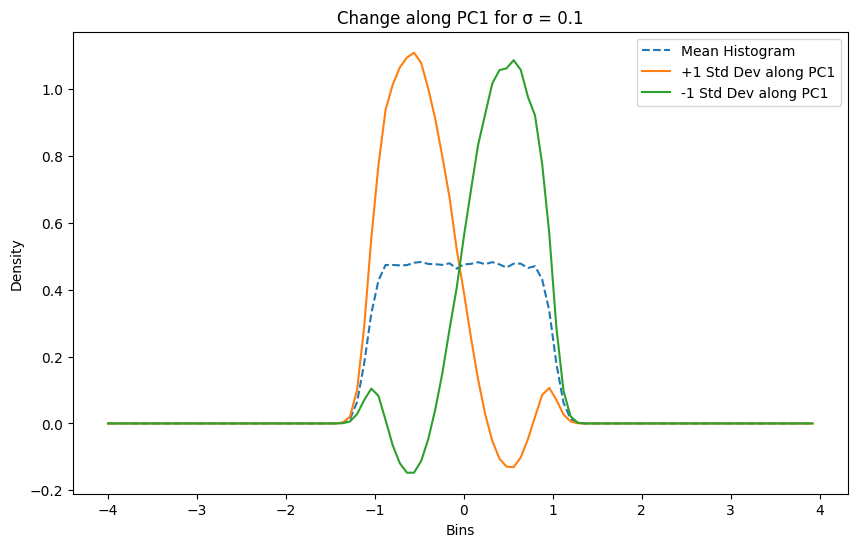

In [12]:
all_histograms = {}
all_mu_values = {}

for sigma in sigma_values:
    histograms, mu_values = generate_histograms_for_sigma(sigma)
    all_histograms[sigma] = histograms
    all_mu_values[sigma] = mu_values

# Visualize the change of histograms along the first PCA direction
def visualize_pca_direction_change(histograms, sigma):
    pca = PCA(n_components=2)
    transformed_data = pca.fit_transform(histograms)
    
    first_pc = pca.components_[0]
    std_dev = np.std(transformed_data[:, 0])
    
    mean_histogram = np.mean(histograms, axis=0)
    plus_one_std = mean_histogram + std_dev * first_pc
    minus_one_std = mean_histogram - std_dev * first_pc
    
    bin_edges = np.linspace(-4, 4, 101)
    
    plt.figure(figsize=(10, 6))
    plt.plot(bin_edges[:-1], mean_histogram, label='Mean Histogram', linestyle='--')
    plt.plot(bin_edges[:-1], plus_one_std, label='+1 Std Dev along PC1')
    plt.plot(bin_edges[:-1], minus_one_std, label='-1 Std Dev along PC1')
    plt.title(f'Change along PC1 for σ = {sigma}')
    plt.xlabel('Bins')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Visualizing for each sigma
for sigma in sigma_values:
    visualize_pca_direction_change(all_histograms[sigma], sigma)


## Exercise 7.2

### Part 1

In [13]:
import numpy as np
from scipy.sparse import coo_array
from scipy.sparse.csgraph import shortest_path

graph1_data = np.load('graph1.npz')
graph2_data = np.load('graph2.npz')

# Construct the sparse matrices
n = 512  # Given number of vertices

graph1 = coo_array((graph1_data['data'], (graph1_data['i'], graph1_data['j'])), shape=(n, n))
graph2 = coo_array((graph2_data['data'], (graph2_data['i'], graph2_data['j'])), shape=(n, n))

# Compute the shortest path distances and square them
shortest_path_graph1 = shortest_path(csgraph=graph1) ** 2
shortest_path_graph2 = shortest_path(csgraph=graph2) ** 2

shortest_path_graph1, shortest_path_graph2


(array([[0.        , 0.00137215, 0.0134599 , ..., 0.00439893, 0.00079767,
         0.00595195],
        [0.00137215, 0.        , 0.02342717, ..., 0.00880423, 0.00089246,
         0.01095273],
        [0.0134599 , 0.02342717, 0.        , ..., 0.00444971, 0.01769144,
         0.01987769],
        ...,
        [0.00439893, 0.00880423, 0.00444971, ..., 0.        , 0.00723032,
         0.00552811],
        [0.00079767, 0.00089246, 0.01769144, ..., 0.00723032, 0.        ,
         0.00918832],
        [0.00595195, 0.01095273, 0.01987769, ..., 0.00552811, 0.00918832,
         0.        ]]),
 array([[0.        , 0.155779  , 0.09366109, ..., 0.03874159, 0.09180859,
         0.04282934],
        [0.155779  , 0.        , 0.01995033, ..., 0.11993592, 0.0682271 ,
         0.19425081],
        [0.09366109, 0.01995033, 0.        , ..., 0.17883578, 0.01499456,
         0.09119676],
        ...,
        [0.03874159, 0.11993592, 0.17883578, ..., 0.        , 0.17778989,
         0.06161617],
        [0.0

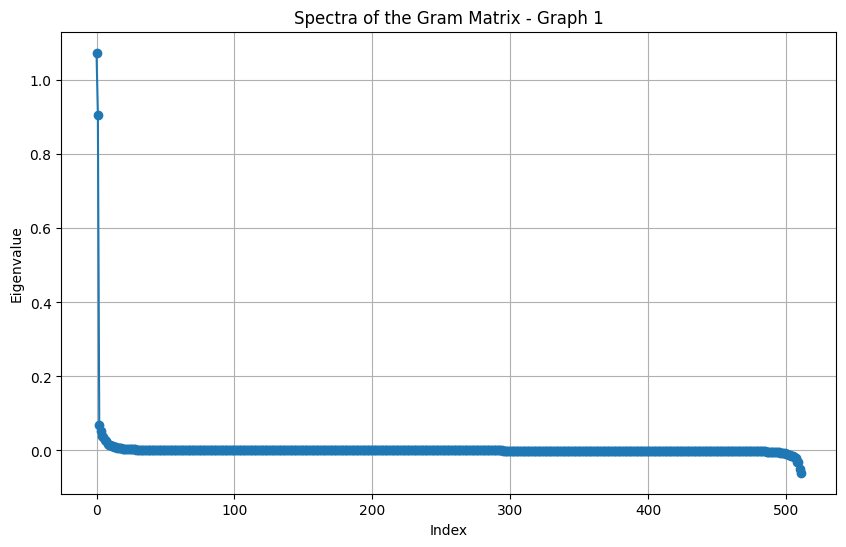

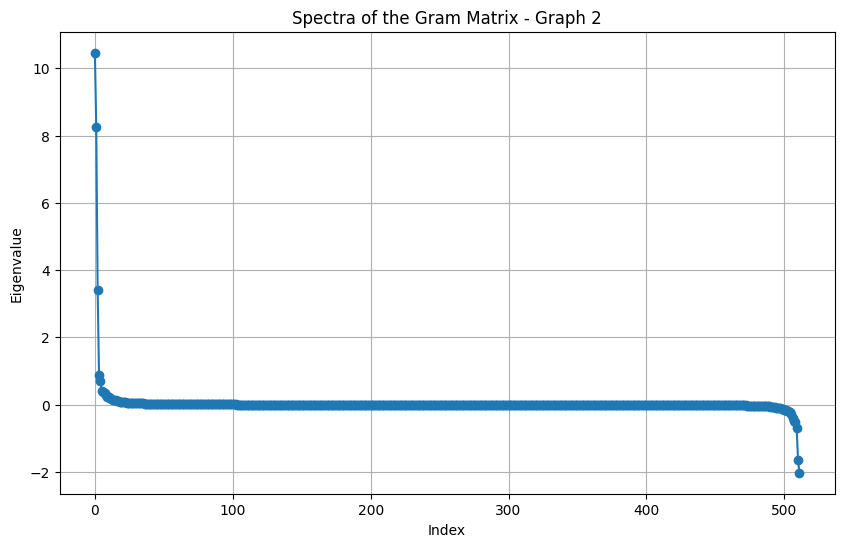

(array([-6.00351167e-02, -4.98979181e-02, -3.11456963e-02, -3.01979497e-02,
        -2.09321639e-02, -1.70794623e-02, -1.53375429e-02, -1.38958866e-02,
        -1.20955319e-02, -1.12519390e-02, -9.69976951e-03, -8.46953066e-03,
        -7.63359533e-03, -6.88338632e-03, -6.53935328e-03, -6.12830128e-03,
        -5.27679666e-03, -4.69912579e-03, -4.28921792e-03, -4.13984406e-03,
        -3.95661319e-03, -3.73187306e-03, -3.45669951e-03, -3.28675582e-03,
        -3.18957007e-03, -2.85191943e-03, -2.62855063e-03, -2.54695087e-03,
        -2.44427716e-03, -2.38322637e-03, -2.27659276e-03, -2.11279412e-03,
        -1.94395890e-03, -1.89178996e-03, -1.79288600e-03, -1.71909115e-03,
        -1.68282777e-03, -1.55211115e-03, -1.49335516e-03, -1.41932859e-03,
        -1.36547530e-03, -1.24365292e-03, -1.19988886e-03, -1.17130435e-03,
        -1.11354306e-03, -1.08737661e-03, -1.03603241e-03, -1.01429692e-03,
        -9.98788673e-04, -9.41470650e-04, -9.05994145e-04, -8.78343219e-04,
        -8.3

In [14]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import numpy as np

def centering_matrix(n):
    return np.eye(n) - np.ones((n, n)) / n

def double_centering(D_squared):
    n = D_squared.shape[0]
    H = centering_matrix(n)
    return -0.5 * H @ D_squared @ H

def run_mds(distance_matrix):
    n = distance_matrix.shape[0]

    B = double_centering(distance_matrix)

    eigvals, eigvecs = np.linalg.eigh(B)
    return eigvals, eigvecs

def plot_spectra(eigenvalues, title):
    plt.figure(figsize=(10, 6))
    plt.plot(np.flip(np.sort(eigenvalues)), marker='o')
    plt.title(f'Spectra of the Gram Matrix - {title}')
    plt.xlabel('Index')
    plt.ylabel('Eigenvalue')
    plt.grid(True)
    plt.show()

eigvals_graph1, _ = run_mds(shortest_path_graph1)
eigvals_graph2, _ = run_mds(shortest_path_graph2)

plot_spectra(eigvals_graph1, "Graph 1")
plot_spectra(eigvals_graph2, "Graph 2")

eigvals_graph1, eigvals_graph2


- **Graph 1:** To get a reasonable approximation, a few dimensions (possibly 2 to 5) might suffice since there are only a few significant positive eigenvalues.
- **Graph 2:** More dimensions might be necessary (possibly 5 to 10 or more) due to the higher spread and larger positive eigenvalues, indicating that more dimensions are required to capture the graph's structure accurately.

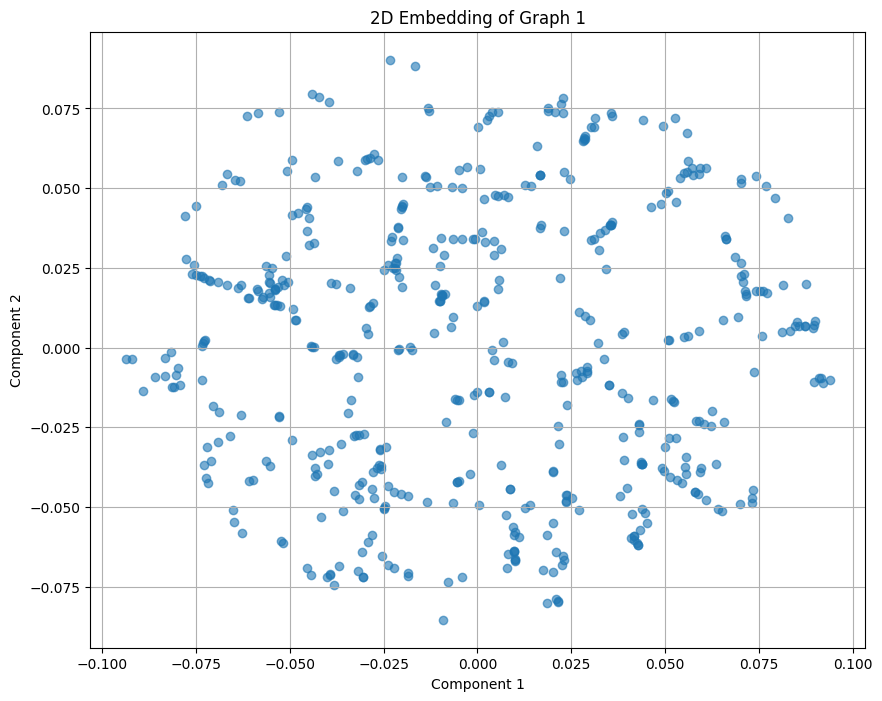

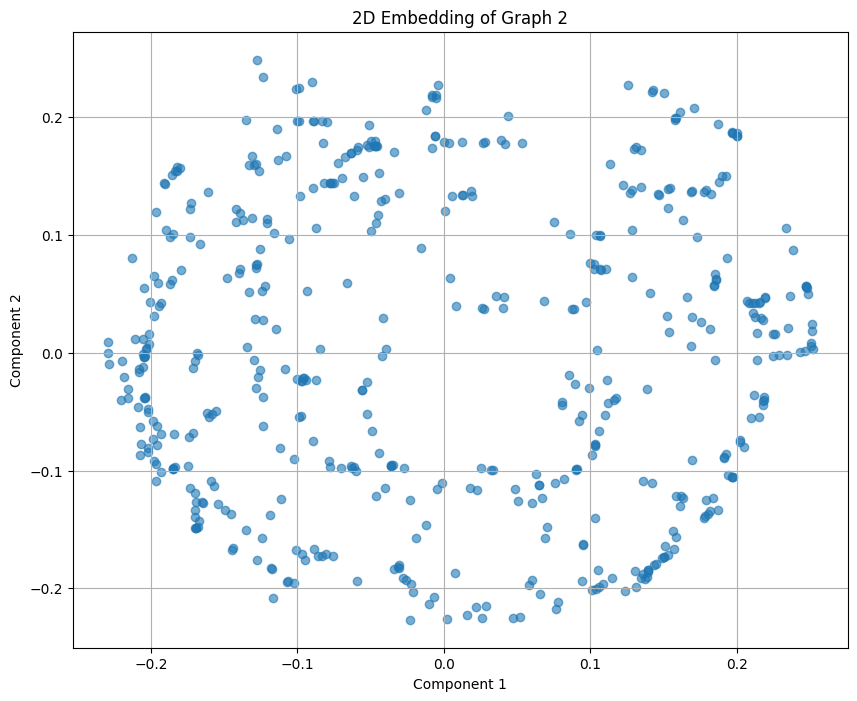

In [15]:
def plot_2d_embedding(eigvals, eigvecs, title):
    # Take the largest two positive eigenvalues and their corresponding eigenvectors
    positive_eigvals_idx = np.argsort(eigvals)[::-1]
    top_two_idx = positive_eigvals_idx[:2]
    
    # Embed the points in 2D space using the top two eigenvectors
    embedding_2d = eigvecs[:, top_two_idx] * np.sqrt(eigvals[top_two_idx])
    
    plt.figure(figsize=(10, 8))
    plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], alpha=0.6)
    plt.title(f'2D Embedding of {title}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

# Obtain the 2D embeddings for both graphs
_, eigvecs_graph1 = run_mds(shortest_path_graph1)
_, eigvecs_graph2 = run_mds(shortest_path_graph2)

# Plot the 2D embeddings
plot_2d_embedding(eigvals_graph1, eigvecs_graph1, "Graph 1")
plot_2d_embedding(eigvals_graph2, eigvecs_graph2, "Graph 2")

The two graphs exhibit qualitatively different structures when embedded in 2D space. Graph 1's embedding is more dispersed, while Graph 2 shows a more clustered and structured pattern. This suggests that Graph 2 has a more identifiable low-dimensional structure compared to Graph 1.